# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [51]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [53]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [54]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [55]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1.4. `df_data` に欠損値がないかを確認しましょう。

In [56]:
df_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [57]:
df_target.sample(n=10)

,target
41,0
60,1
89,1
77,1
130,2
56,1
85,1
124,2
112,2
120,2


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

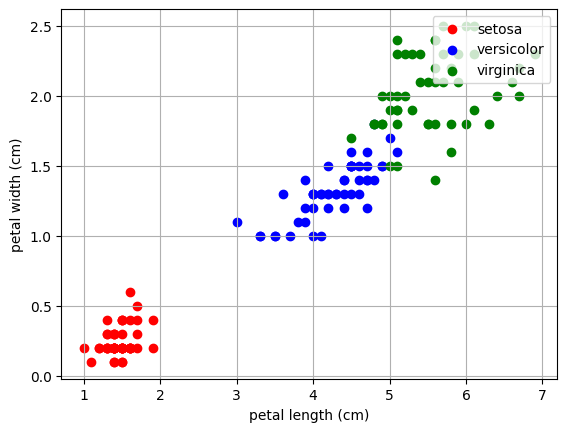

In [58]:
import matplotlib.pyplot as plt
df_join = df_target.join(df_data)
df_setosa = df_join[df_join['target'] == 0]
df_versicolor = df_join[df_join['target'] == 1]
df_virginica = df_join[df_join['target'] == 2]
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], c="r", label="setosa")
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], c="b", label="versicolor")
plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'], c="g", label="virginica")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)") 
plt.legend(loc="upper right")
plt.grid(True)


## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=2)

4.2. 本当に4:1に分割できているか確認しましょう。

In [68]:
print(
    x_train.shape,
    x_test.shape,
    y_test.shape,
    y_train.shape
    )

(120, 4) (30, 4) (30, 1) (120, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [61]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC(n_jobs=-1, random_state=0)

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [62]:
clf.fit(x_train, y_train)

/Users/Sairenji/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_jobs=-1, random_state=0)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [65]:
model_test = clf.predict(x_test)

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_test)

0.9666666666666667

実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。